In [59]:
pip install tinkoff-investments

In [60]:
#pip install git+https://github.com/pydata/pandas-datareader.git


In [61]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader as pdr
import csv

from datetime import date
from tinkoff.invest import CandleInterval, Client, InstrumentStatus
from tinkoff.invest.services import InstrumentsService, MarketDataService
from tinkoff.invest.schemas import CandleSource
from tinkoff.invest.utils import now
from datetime import timedelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf







In [62]:
TOKEN = "t.t_Urs-ndt9r7lYGXL0Ob3Zs55v-3NxZCaFhpk6FdVsemj-x4H4pGufVj2U3LN5shf65dASPqOgTrPnFhk0NWtw"

In [88]:
with Client(TOKEN) as client:
    with open('data.csv', mode='w', newline='') as file:
        fieldnames = ['Close']  # Заголовки столбцов
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        
        for candle in client.get_all_candles(
            instrument_id="BBG004RVFFC0",
            from_=now() - timedelta(days=4000),
            interval=CandleInterval.CANDLE_INTERVAL_DAY,
            candle_source_type=CandleSource.CANDLE_SOURCE_UNSPECIFIED,
        ):
            cand = candle.close.units
            writer.writerow({'Close': cand})

In [89]:
data_closed = pd.read_csv('data.csv')
print(data_closed)

      Close
0       177
1       183
2       176
3       170
4       182
...     ...
2786    721
2787    728
2788    729
2789    731
2790    736

[2791 rows x 1 columns]


In [90]:
# filename= 'C:/Users/User/Desktop/TATN for predict/TATN_220101_240101.csv'
# df = pd.read_csv(filename, sep=",")
# print(df.shape, df.columns)
# df.rename(columns={"<DATE>": "Data", "<TIME>": "Time", "<OPEN>": "Open", "<HIGH>": "High", "<LOW>": "Low", "<CLOSE>": "Close", "<VOL>": "Volume"}, inplace=True)
# print(df.shape, df.columns)
# df['Data'] = pd.to_datetime(df['Data'], format='mixed')
# # %Y%m%d
# print(df.shape, df.columns)
# df = df.drop(['Time'], axis=1)
# # df = df.drop(['Date', 'Adj Close'], axis = 1)

In [91]:
# df.tail()


In [92]:

# df.head()

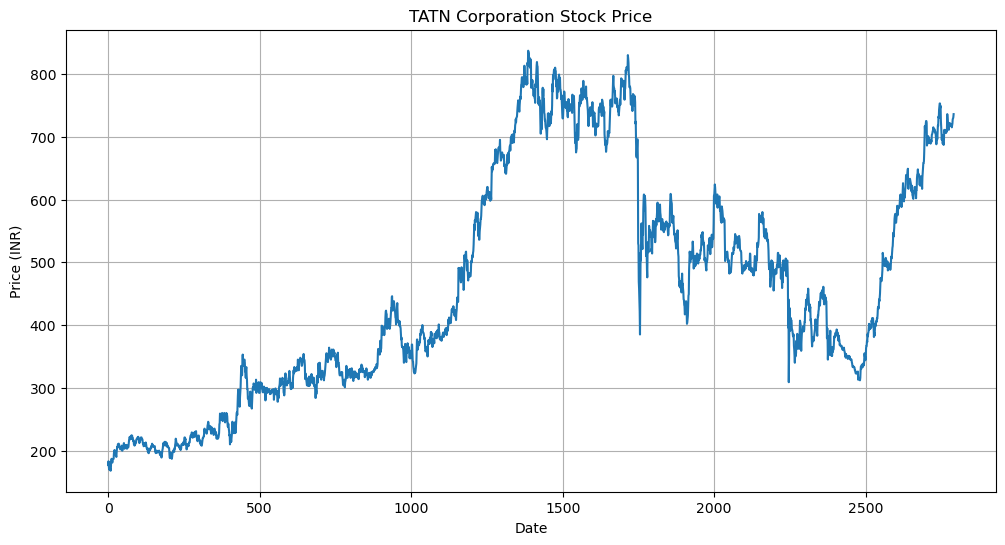

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(data_closed['Close'])
plt.title("TATN Corporation Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [94]:
ma100 = data_closed.Close.rolling(100).mean()
ma100

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
2786    706.25
2787    707.18
2788    708.04
2789    708.82
2790    709.60
Name: Close, Length: 2791, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

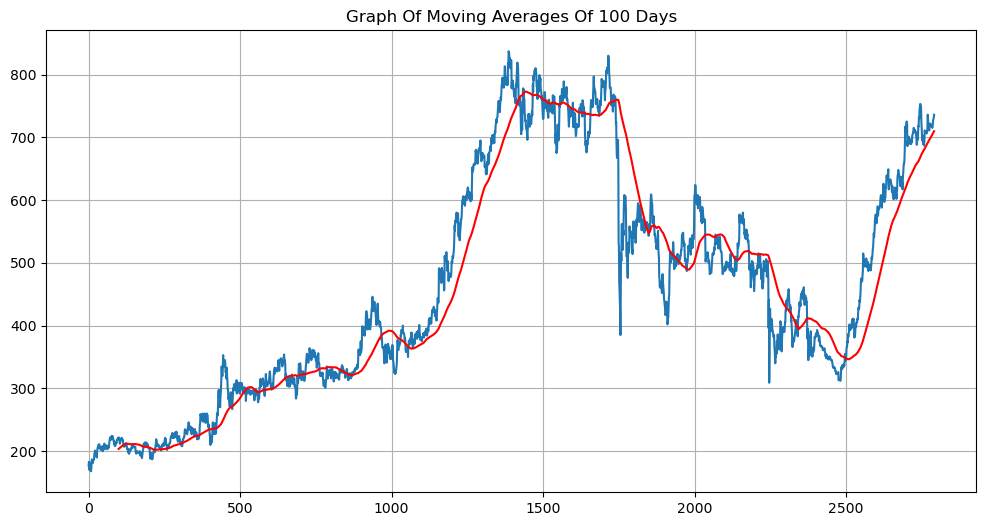

In [95]:
plt.figure(figsize = (12,6))
plt.plot(data_closed.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [96]:
ma200 = data_closed.Close.rolling(200).mean()
ma200

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
2786    656.325
2787    657.385
2788    658.415
2789    659.440
2790    660.435
Name: Close, Length: 2791, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

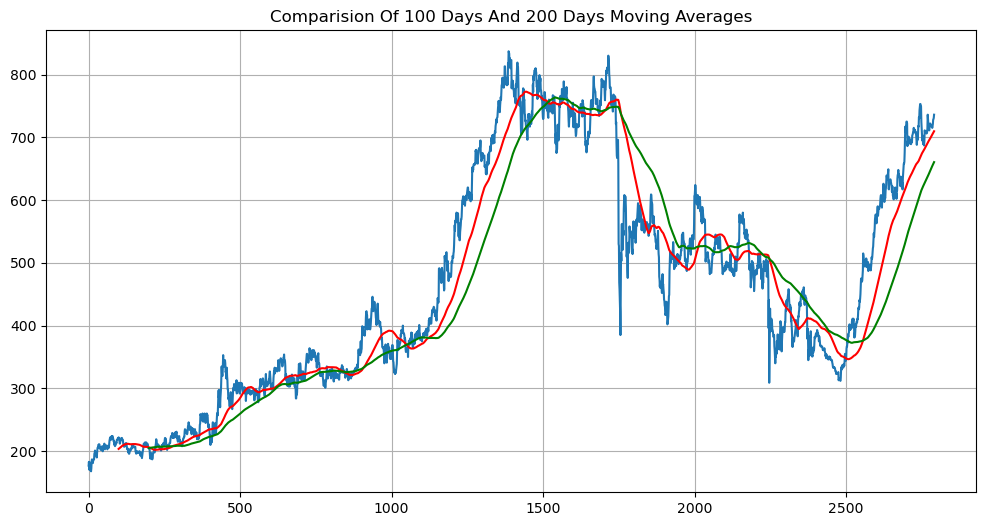

In [97]:
plt.figure(figsize = (12,6))
plt.plot(data_closed.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [98]:
data_closed.shape


(2791, 1)

In [132]:
# Разделяем данные в соотношении 70% на 30%

train = pd.DataFrame(data_closed[0:int(len(data_closed)*0.70)])
test = pd.DataFrame(data_closed[int(len(data_closed)*0.70): int(len(data_closed))])

print(train.shape)
print(test.shape)

(1953, 1)
(838, 1)


In [133]:
train.tail()

,Close
1948,505
1949,504
1950,507
1951,505
1952,507


In [134]:
test.tail()


,Close
2786,721
2787,728
2788,729
2789,731
2790,736


In [135]:
# Применяем MinMaxScaler для нормализации данных

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [137]:
train_close = train.iloc[:, 0:1].values
test_close = test.iloc[:, 0:1].values

In [138]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01345291],
       [0.02242152],
       [0.01195815],
       ...,
       [0.50672646],
       [0.50373692],
       [0.50672646]])

In [139]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [140]:
 x_train.shape

(1853, 100, 1)

In [141]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [142]:
model = Sequential()
model.add(LSTM(units = 100, activation = 'tanh', return_sequences=True, input_shape = (x_train.shape[1], 1)))
#model.add(Dropout(0.2))


#model.add(LSTM(units = 60, activation = 'tanh', return_sequences=True))
#model.add(Dropout(0.3))


#model.add(LSTM(units = 80, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.1))


model.add(LSTM(units = 200, activation = 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [143]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 200)            │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,801 (1.07 MB)

 Trainable params: 281,801 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [144]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 0.1142 - mean_absolute_error: 0.1142
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0303 - mean_absolute_error: 0.0303
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0300 - mean_absolute_error: 0.0300
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0278 - mean_absolute_error: 0.0278
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0276 - mean_absolute_error: 0.0276
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0272 - mean_absolute_error: 0.0272
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0247 - mean_absolute_error: 0.0247
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 0.0278 - mean_absolute_error: 0.0278
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0245 - mean_absolute_error: 0.0245
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0239 - mean_absolute_error: 0.0239


In [145]:
model.save('keras_model.keras')

In [146]:
test_close.shape

(838, 1)

In [147]:
past_100_days = pd.DataFrame(train_close[-4000:])

In [148]:
test_data_closed = pd.DataFrame(test_close)

In [149]:
final_data_closed = pd.concat([past_100_days, test_data_closed], ignore_index=True)

In [152]:
final_data_closed

,0
0,177
1,183
2,176
3,170
4,182
...,...
2786,721
2787,728
2788,729
2789,731


In [153]:
input_data = scaler.fit_transform(final_data_closed)
input_data

array([[0.01345291],
       [0.02242152],
       [0.01195815],
       ...,
       [0.83856502],
       [0.84155456],
       [0.8490284 ]])

In [154]:
input_data.shape

(2791, 1)

In [155]:
x_test = []
y_test = []
for i in range(1000, input_data.shape[0]):
   x_test.append(input_data[i-1000: i])
   y_test.append(input_data[i, 0])

In [156]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1791, 1000, 1)
(1791,)


In [157]:
#Формируем набор прогнозных значения и накладываем их на 
#график с истинными значениями из тестовой выборки

In [158]:
# Making predictions

y_pred = model.predict(x_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 291ms/step


In [159]:
y_pred.shape

(1791, 1)

In [160]:
y_test

array([0.2735426 , 0.27503737, 0.30044843, ..., 0.83856502, 0.84155456,
       0.8490284 ])

In [128]:
y_pred

array([[ 3.62837523e-01],
       [ 3.67596656e-01],
       [ 3.71813238e-01],
       [ 3.79707843e-01],
       [ 3.85473251e-01],
       [ 3.93246263e-01],
       [ 4.10575688e-01],
       [ 4.21739370e-01],
       [ 4.32663530e-01],
       [ 4.39626575e-01],
       [ 4.43582624e-01],
       [ 4.36042696e-01],
       [ 4.27454203e-01],
       [ 4.16504562e-01],
       [ 4.10953045e-01],
       [ 4.00470555e-01],
       [ 3.82632971e-01],
       [ 3.71017516e-01],
       [ 3.64406914e-01],
       [ 3.59879047e-01],
       [ 3.53343815e-01],
       [ 3.44761461e-01],
       [ 3.36538285e-01],
       [ 3.40682983e-01],
       [ 3.46783161e-01],
       [ 3.53757948e-01],
       [ 3.63318533e-01],
       [ 3.80821794e-01],
       [ 3.92371804e-01],
       [ 3.98346305e-01],
       [ 3.98442864e-01],
       [ 4.00235593e-01],
       [ 4.08655107e-01],
       [ 4.17414695e-01],
       [ 4.12457883e-01],
       [ 3.99287760e-01],
       [ 3.94652575e-01],
       [ 3.94459546e-01],
       [ 3.9

In [161]:
scaler.scale_


array([0.00149477])

In [162]:
scale_factor = 1/0.00149477
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

In [166]:
print(y_test)

[182.99979321 183.99979208 200.99977287 ... 560.99936607 562.99936381
 567.99935816]


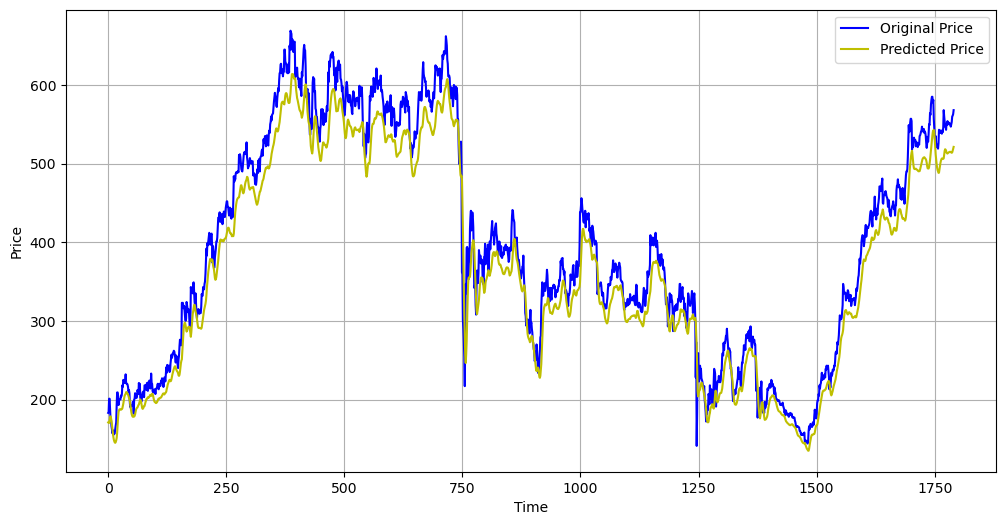

In [163]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'y', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [382]:
# Оценка точности модели

In [54]:
# Расчет средней абсолютной ошибки
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.44%


In [55]:
# Расчет оценки R2
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9881037452850048


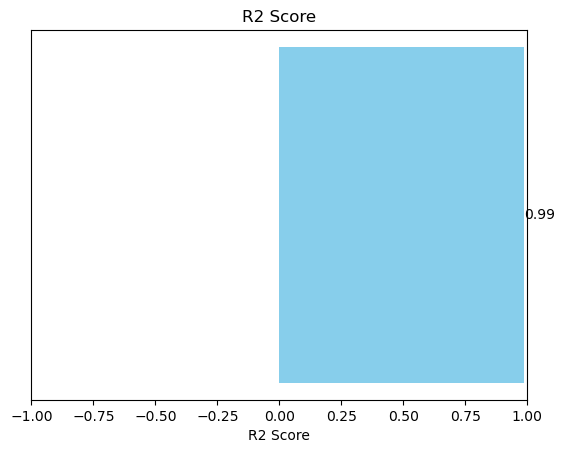

In [56]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

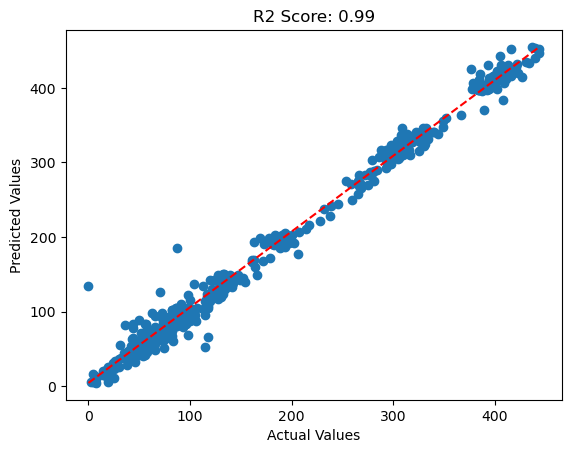

In [57]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [191]:
# Определяем структуру нашей модели
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(None, 1))) # Первый слой - это LSTM сеть
model.add(Dense(1)) # второй слой - обычная линейная регрессия
model.compile(optimizer='adam', loss='mean_squared_error') # в качестве метода оптимизации и

In [152]:
# Готовим данные для обучения сети
window_size = 10  # Выбираем размер окна для формирования предсказания
# Готовим тренировочные данные - выбираем окна размером 10 и для каждого окна ожидаемый результат 11-ое значение
X_train = np.array([train.iloc[i-window_size:i].values for i in range(window_size, len(train))])
y_train = train.iloc[window_size:, 0].values
# Аналогично готовим данные для проверки качества обучения сети
X_test = np.array([test.iloc[i-window_size:i].values for i in range(window_size, len(test))])
y_test = test.iloc[window_size:, 0].values
# Преобразовываем данные в формат входа LSTM модели
X_train = X_train.reshape(X_train.shape[0], window_size, 1)
X_test = X_test.reshape(X_test.shape[0], window_size, 1)

In [122]:
print(train[:31])
print(X_train[0])
print(X_train[1])
print(y_train)

       Close
0   1.000000
1   1.000000
2   0.889105
3   0.907588
4   0.924125
5   0.964981
6   0.979572
7   0.907101
8   0.915856
9   0.904183
10  0.798638
11  0.879864
12  0.821984
13  0.799611
14  0.726654
15  0.824903
16  0.769455
17  0.851654
18  0.942607
19  0.923638
20  0.884728
21  0.883755
22  0.866245
23  0.880350
24  0.886187
25  0.920720
26  0.956712
27  0.917802
28  0.821498
29  0.838035
30  0.917802
[[1.        ]
 [1.        ]
 [0.88910506]
 [0.90758755]
 [0.92412451]
 [0.96498054]
 [0.97957198]
 [0.90710117]
 [0.91585603]
 [0.90418288]]
[[1.        ]
 [0.88910506]
 [0.90758755]
 [0.92412451]
 [0.96498054]
 [0.97957198]
 [0.90710117]
 [0.91585603]
 [0.90418288]
 [0.79863813]]
[0.79863813 0.87986381 0.82198444 0.79961089 0.7266537  0.82490272
 0.76945525 0.8516537  0.942607   0.92363813 0.88472763 0.88375486
 0.86624514 0.88035019 0.88618677 0.92071984 0.95671206 0.91780156
 0.82149805 0.83803502 0.91780156 0.94406615 0.88132296 0.79085603
 0.4192607  0.64105058 0.         

In [218]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

NameError: name 'X_train' is not defined

In [185]:
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0133 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 
Train Loss: 0.009009279310703278
Test Loss: 0.002591639757156372


In [186]:
# Делаем прогноз
print("Getting recent data...")
# Формируем данные для входа сети - забираем с хвоста 11 значений и удаляем послденее, полученный массив приводим к формату входа сети (1,10,1)
recent_data = np.resize(np.array(df_scaled['Close'].tail(window_size + 1)), window_size).reshape(1, window_size, 1)
print(recent_data)
print("Making prediction...")
# Делаем прогноз следующего значения
predicted_value_scaled = model.predict(recent_data)
print("Reversing scaling...")
# Преобразуем нормализованный прогноз в исходное значение
predicted_value = scaler.inverse_transform(predicted_value_scaled)
print("=========")
print(predicted_value)
print("=========")
# Сравниваем с известным значением - последним значением исходной выборки
actual_value = np.array(df['Close'].iloc[-1]).reshape(-1,1)
print("Predicted priсe: ", predicted_value[0][0])
print("Actual priсe: ", actual_value[0][0])

Getting recent data...
[[[0.18822957]
  [0.21789883]
  [0.20087549]
  [0.1979572 ]
  [0.192607  ]
  [0.19941634]
  [0.1901751 ]
  [0.17996109]
  [0.19066148]
  [0.18822957]]]
Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Reversing scaling...
[[359.05368]]
Predicted priсe:  359.05368
Actual priсe:  351.6
